### 큐(QUEUE)
    - 스택과 같이 데이터를 임시 저장하는 자료구조 
    - 스택처럼 후입선출 구조가 아님 
    - 큐는 선입선출(가장 먼저 넣은 데이터를 가장 먼저 꺼냄) 구조
    - enqueue : 큐에 데이터를 추가하는 작업 
    - dequeue : 큐에 데이터를 꺼내는 작업 
    - dequeue할 때 배열의 원소를 옮겨야하므로 처리 복잡도가 O(n)이므로 프로그램의 효율성이 떨어진다.

### Ring Buffer 
    - dequeue할 때 배열 안의 원소를 옮기지 않는 큐를 구현하는 자료 구조 
    - 배열 맨 끝의 원소 뒤에 맨 앞의 원소가 연결되는 자료 구조 
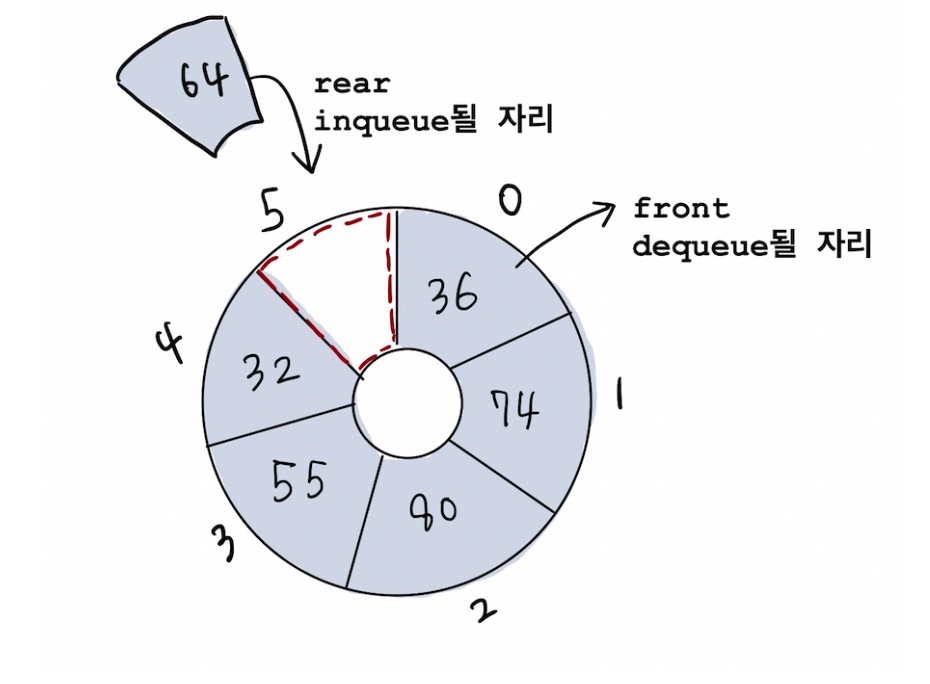
    - 디큐 : 36을 디큐하면 front값을 que[1]로 업데이트 
    - 인큐 : que[5]자리에 62저장, rear값을 que[0]으로 업데이트 front가 que[1]이기 때문에 que[0]이 rear가 됨
    - 원소를 옮길 필요 없이 front와 rear의 값을 업데이트하는 것만으로 인큐와 디큐를 수행가능 
    - 하지만 처리 복잡도는 O(n)
출처 : https://sustainable-dev.tistory.com/35

In [3]:
from enum import Enum
from fixed_queue import FixedQueue

Menu = Enum('Menu', ['Enque', 'Deque', 'Peek', 'Find', 'Dump', 'End'])

def select_menu() -> Menu:
    
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep = '  ', end = '')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)
        
q = FixedQueue(64)
# 최대 64개를 인큐할 수 있는 큐 

while True:
    print(f'현재 데이터 개수 : {len(q)} / {q.capacity}')
    menu = select_menu()
    
    if menu == Menu.Enque:
        x = int(input('인큐할 데이터를 입력하세요 : '))
        try:
            q.enque(x)
        except FixedQueue.Full: # 예외처리
            print('큐가 가득 찼습니다.')
            
    elif menu == Menu.Deque:
        try:
            x = q.deque()
            print(f'디큐한 데이터는 {x}입니다.')
        except FixedQueue.Empty: # 예외처리
            print('큐가 비어 있습니다.')
            
    elif menu == Menu.Peek:
        try:
            x = q.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비어 있습니다.')
            
    elif menu == Menu.Find:
        x = int(input('검색할 값을 입력하세요 : '))
        if x in q:
            print(f'{q.count(x)}개 포함되고, 맨 앞의 위치는 {q.find(x)}입니다.')
        else:
            print('검색한 값을 찾을 수 없습니다.')
            
    elif menu == Menu.Dump:
        q.dump()
    else:
        break
        
        

현재 데이터 개수 : 0 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 1
현재 데이터 개수 : 1 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 2
현재 데이터 개수 : 2 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 3
현재 데이터 개수 : 3 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 1
현재 데이터 개수 : 4 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 5
현재 데이터 개수 : 5 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 5
12315
현재 데이터 개수 : 5 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 4
검색할 값을 입력하세요 : 1
2개 포함되고, 맨 앞의 위치는 0입니다.
현재 데이터 개수 : 5 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 3
피크한 데이터는 1입니다.
현재 데이터 개수 : 5 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 2
현재 데이터 개수 : 6 / 64
(1)Enque  (2)Deque  (3)Peek  (4)Find  (5)Dump  (6)End: 1
인큐할 데이터를 입력하세요 : 2
현재 데이터 개수 : 7 / 64
(1)Enque  (2)Deque  (3)Pee

### 정리 
    - 큐는 스택과 다르게 선입선출구조로써 먼저 입력된것을 먼저 추출하는 구조 
    - 링버퍼는 front와 rear가 변동함 
    - 임시 데이터들이 이렇게 저장된다는 것을 알 수 있었음 
    - 인큐, 디큐, 피크, 푸시, 팝 등 다양한 용어를 알 수 있었음 
    - 예외처리에 대해서 알 수 있었음 
    - 데이터 입력 및 추출을 원하는 방식에 따라 스택과 큐를 사용
    - 링버퍼는 인큐와 디큐를 할 때 자료를 이동시키지 않아도 되는 순환구조로 이루어져있음

### 보충 
    - 링 버퍼를 오래된 데이터를 버리는 용도로 활용가능 
    - 가장 최근에 입력한 n개만 링 버퍼에 남아 있는 것 

In [4]:
n = int(input('정수 몇 개 저장할까요? : '))
a = [None] * n

cnt = 0
while True:
    a[cnt % n ] = int(input((f'{cnt + 1}번째 정수를 입력하세요 : ')))
    cnt += 1 
    
    retry = input(f'계속 할까요?(Y ... Yes / N ... No):')
    if retry in {'N', 'n'}:
        break
        
i = cnt - n
if i <0 : i = 0

while i < cnt:
    print(f'{i + 1}번째 = {a[i % n]}')
    i += 1
    
# 지정된 개수만큼만 저장되고 오래된 데이터는 삭제됨 

정수 몇 개 저장할까요? : 5
1번째 정수를 입력하세요 : 1
계속 할까요?(Y ... Yes / N ... No):Y
2번째 정수를 입력하세요 : 2
계속 할까요?(Y ... Yes / N ... No):Y
3번째 정수를 입력하세요 : 3
계속 할까요?(Y ... Yes / N ... No):Y
4번째 정수를 입력하세요 : 4
계속 할까요?(Y ... Yes / N ... No):Y
5번째 정수를 입력하세요 : 6
계속 할까요?(Y ... Yes / N ... No):Y
6번째 정수를 입력하세요 : 4
계속 할까요?(Y ... Yes / N ... No):Y
7번째 정수를 입력하세요 : 8
계속 할까요?(Y ... Yes / N ... No):N
3번째 = 3
4번째 = 4
5번째 = 6
6번째 = 4
7번째 = 8
